# single fidelity function

In [1]:
from mfpml.design_of_experiment.plot_figures import plot_sf_sampling, plot_mf_sampling
from mfpml.design_of_experiment.sf_samplers import LatinHyperCube
from mfpml.problems.sf_functions import Branin
from mfpml.problems.mf_functions import Forrester_1b

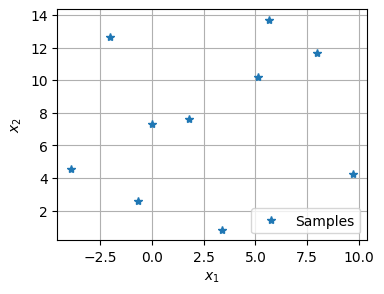

In [2]:
# define function
function = Branin()
design_space = function.design_space
# test sampling part
sampler = LatinHyperCube(design_space=design_space, seed=12)
sample_x = sampler.get_samples(num_samples=10)

sampler.plot_samples(figsize=(4,3))

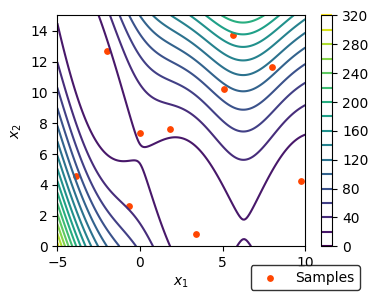

In [3]:
sample_y = function.f(sample_x)
plot_sf_sampling(
    samples=sample_x, responses=sample_y, function=function, save_figure=False, figsize=(4,3)
)

# Multi-fidelity functions 

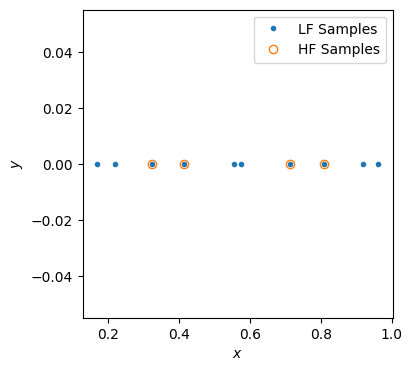

In [4]:
# define function
from mfpml.design_of_experiment.mf_samplers import SobolSequence
function = Forrester_1b()
design_space = function.design_space
# test sampling part
sampler = SobolSequence(design_space=design_space, seed=12, nested=True)
samples = sampler.get_samples(num_lf_samples=10, num_hf_samples=4)
sampler.plot_samples(figsize=(4,4))

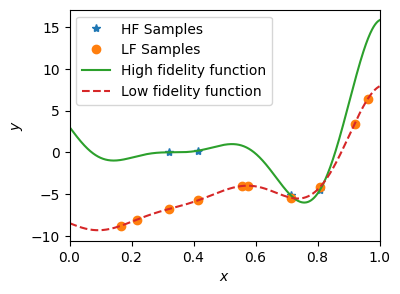

In [5]:
sample_y = {}
sample_y["hf"] = function.hf(samples["hf"])
sample_y["lf"] = function.lf(samples["lf"])

plot_mf_sampling(
    samples=samples, responses=sample_y, function=function, figsize=(4,3)
)


In [6]:
sample_y

{'hf': array([[-4.49853915e+00],
        [-5.12923283e+00],
        [ 1.98789697e-01],
        [-5.65367131e-04]]),
 'lf': array([[-4.1700473 ],
        [-5.43372262],
        [-5.75155027],
        [-6.77643713],
        [-4.03765842],
        [ 6.42069805],
        [-8.77875965],
        [-8.05337556],
        [ 3.42526783],
        [-3.99849013]])}